VaR and ES calculated from .csv previously created.
confidence level of 90/95
Correcting schema for dataframe.
mean and std for price each 5m. 

Some few sources
https://arch.readthedocs.io/en/latest/univariate/univariate_volatility_forecasting.html
http://www.quantatrisk.com/2013/03/30/garchpq-model-and-exit-strategy-for-intraday-algorithmic-traders/
https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/
http://barnesanalytics.com/garch-models-in-python
https://www.risk.net/risk-magazine/technical-paper/1506669/var-versus-expected-shortfall
https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic09_time_series/topic9_part1_time_series_python.ipynb

# First things first

In [1]:
import os, sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
# Data manipulation
import numpy as np
import pandas as pd
import datetime

# Plotting
import matplotlib.pyplot as plt
import seaborn
import matplotlib.mlab as mlab

# Statistical manipulation
from scipy.stats import norm

# Tabulate data
from tabulate import tabulate


main_path = os.getcwd()

df_cpa = pd.read_csv(os.path.join(main_path, r"Bases\OFER_CPA_20180731.txt"), 
                     sep=";",low_memory=False,header=1)

df_vda = pd.read_csv(os.path.join(main_path, r"Bases\OFER_VDA_20180731.txt"), 
                     sep=";",low_memory=False,header=1,error_bad_lines = False)

In [3]:
df_cpa.columns = ['Data_Sessão',
'Símbolo_do_Instrumento',
'Sentido_Of_Compra',
'Sequência',
'GenerationID_Of_Compra',
'Cód_do_Evento_da_Of_Compra',
'Hora_Prioridade',
'Ind_de_Prioridade_Of_Compra',
'Preço_Of_Compra',
'Qtd_Total_Of_Compra',
'Qtd_Negociada_Of_Compra',
'Data_Oferta_Compra',
'Data_de_Entrada_Of_Compra',
'Estado_Of_Compra',
'Condição_Oferta',
'Corretora']

df_vda.columns = ['Data_Sessão',
'Símbolo_do_Instrumento',
'Sentido_Of_Compra',
'Sequência',
'GenerationID_Of_Compra',
'Cód_do_Evento_da_Of_Compra',
'Hora_Prioridade',
'Ind_de_Prioridade_Of_Compra',
'Preço_Of_Compra',
'Qtd_Total_Of_Compra',
'Qtd_Negociada_Of_Compra',
'Data_Oferta_Compra',
'Data_de_Entrada_Of_Compra',
'Estado_Of_Compra',
'Condição_Oferta',
'Corretora']


In [5]:
list = ['SUZB3                                             ',
'MGLU3                                             ',
'FIBR3                                             ',
'BTOW3                                             ',
'VALE3                                             ',
'BRKM5                                             ',
'EMBR3                                             ',
'PETR4                                             ',
'CPFE3                                             ',
'KLBN4                                             ',
'BRFS3                                             ',
'KROT3                                             ',
'ELET6                                             ',
'QUAL3                                             ',
'UGPA3                                             ',
'ECOR3                                             ',
'ELET3                                             ',
'CCRO3                                             ',
'SBSP3                                             ',
'GOLL4                                             ']

In [6]:
df_cpa = df_cpa[df_cpa["Símbolo_do_Instrumento"].isin(list)] # elimina assets no estudiados

#df_cpa.drop(['Data_Sessão','Sentido_Of_Compra','Corretora'], inplace = True, axis = 1)
df_cpa.drop(['Data_Sessão',

'Sentido_Of_Compra',
'Sequência',
'GenerationID_Of_Compra',
'Cód_do_Evento_da_Of_Compra',

'Ind_de_Prioridade_Of_Compra',

'Qtd_Total_Of_Compra',
'Qtd_Negociada_Of_Compra',
'Data_Oferta_Compra',
'Data_de_Entrada_Of_Compra',
'Estado_Of_Compra',
'Condição_Oferta',
'Corretora'],inplace = True, axis = 1)

####################################################################################################################### 
################################################################################################################# Venda
####################################################################################################################### 
df_dva = df_vda[df_vda["Símbolo_do_Instrumento"].isin(list)] # elimina assets no estudiados

#df_cpa.drop(['Data_Sessão','Sentido_Of_Compra','Corretora'], inplace = True, axis = 1)
df_vda.drop(['Data_Sessão',

'Sentido_Of_Compra',
'Sequência',
'GenerationID_Of_Compra',
'Cód_do_Evento_da_Of_Compra',

'Ind_de_Prioridade_Of_Compra',

'Qtd_Total_Of_Compra',
'Qtd_Negociada_Of_Compra',
'Data_Oferta_Compra',
'Data_de_Entrada_Of_Compra',
'Estado_Of_Compra',
'Condição_Oferta',
'Corretora'],inplace = True, axis = 1)

In [236]:
SUZB3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='SUZB3                                             ']
SUZB3 = SUZB3.sort_values(by=['Hora_Prioridade'])

MGLU3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='MGLU3                                             ']
MGLU3 = MGLU3.sort_values(by=['Hora_Prioridade'])

FIBR3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='FIBR3                                             ']
FIBR3 = FIBR3.sort_values(by=['Hora_Prioridade'])

BTOW3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='BTOW3                                             ']
BTOW3 = BTOW3.sort_values(by=['Hora_Prioridade'])

VALE3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='VALE3                                             ']
VALE3 = VALE3.sort_values(by=['Hora_Prioridade'])

BRKM5 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='BRKM5                                             ']
BRKM5 = BRKM5.sort_values(by=['Hora_Prioridade'])

EMBR3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='EMBR3                                             ']
EMBR3 = EMBR3.sort_values(by=['Hora_Prioridade'])

PETR4 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='PETR4                                             ']
PETR4 = PETR4.sort_values(by=['Hora_Prioridade'])

CPFE3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='CPFE3                                             ']
CPFE3 = CPFE3.sort_values(by=['Hora_Prioridade'])

KLBN4 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='KLBN4                                             ']
KLBN4 = KLBN4.sort_values(by=['Hora_Prioridade'])

BRFS3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='BRFS3                                             ']
BRFS3 = BRFS3.sort_values(by=['Hora_Prioridade'])

KROT3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='KROT3                                             ']
KROT3 = KROT3.sort_values(by=['Hora_Prioridade'])

ELET6 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='ELET6                                             ']
ELET6 = ELET6.sort_values(by=['Hora_Prioridade'])

QUAL3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='QUAL3                                             ']
QUAL3 = QUAL3.sort_values(by=['Hora_Prioridade'])

UGPA3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='UGPA3                                             ']
UGPA3 = UGPA3.sort_values(by=['Hora_Prioridade'])

ECOR3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='ECOR3                                             ']
ECOR3 = ECOR3.sort_values(by=['Hora_Prioridade'])

ELET3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='ELET3                                             ']
ELET3 = ELET3.sort_values(by=['Hora_Prioridade'])

CCRO3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='CCRO3                                             ']
CCRO3 = CCRO3.sort_values(by=['Hora_Prioridade'])

SBSP3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='SBSP3                                             ']
SBSP3 = SBSP3.sort_values(by=['Hora_Prioridade'])

GOLL4 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='GOLL4                                             ']
GOLL4 = GOLL4.sort_values(by=['Hora_Prioridade'])
#GOLL4['return'] = GOLL4.Preço_Of_Compra.pct_change()
#is_inf = GOLL4['return'].iloc[:] == np.inf
#GOLL4['return'] = GOLL4['return'].loc[~is_inf, ]
#mean_GOLL4 = np.mean(GOLL4['return'])
#std_GOLL4 = np.std(GOLL4['return'])


In [ ]:
df_cpa.to_csv(os.path.join(main_path, r"Bases\CPA\OFER_CPA_20180731.csv"), 
              index=False)

df_vda.to_csv(os.path.join(main_path, r"Bases\VDA\OFER_VDA_20180731.csv"), 
              index=False)

# working on the actual DataFrame

In [235]:
df_cpa = pd.read_csv(os.path.join(main_path, r"Bases\CPA\OFER_CPA_20180731.csv"))

#df_vda = pd.read_csv(os.path.join(main_path, r"Bases\VDA\OFER_VDA_20180731.csv"))

In [245]:
# Transforma para segundos o horario de prioridade
def time_to_second(data):
    data['parts'] = data['Hora_Prioridade'].apply(lambda x: x.split(':'))
    data['seconds'] = data['parts'].apply(lambda x: round(int(x[0])*(60*60) + int(x[1])*60 + float(x[2])))

# calcula a media de preco da acao num intervalo de 5minutos    
def media_temp(data, gran = 300):
    init = data['seconds'].iloc[0]
    end = data['seconds'].iloc[-1]
    lista = []
    media = []
    for i in range(len(data)):
        if data['seconds'].iloc[i] - init <= gran:
            lista.append(data['Preço_Of_Compra'].iloc[i])
        else:
            media.append(np.sum(lista) / len(lista))
            lista = []
            init = data['seconds'].iloc[i]
    
    headers = ['mean']
    
    df = pd.DataFrame(data = media, columns = headers)
    df['return'] = df['mean'].pct_change()
        
    return df

In [251]:
# SUZB3
time_to_second(SUZB3)
SUZB3      = media_temp(SUZB3)
mean_SUZB3 = np.mean(SUZB3['return'])
std_SUZB3  = np.std(SUZB3['return'])


# MGLU3
time_to_second(MGLU3)
MGLU3      = media_temp(MGLU3)
mean_MGLU3 = np.mean(MGLU3['return'])
std_MGLU3  = np.std(MGLU3['return'])


# FIBR3
time_to_second(FIBR3)
FIBR3      = media_temp(FIBR3)
mean_FIBR3 = np.mean(FIBR3['return'])
std_FIBR3  = np.std(FIBR3['return'])


# BTOW3
time_to_second(BTOW3)
BTOW3      = media_temp(BTOW3)
mean_BTOW3 = np.mean(BTOW3['return'])
std_BTOW3  = np.std(BTOW3['return'])


# VALE3
time_to_second(VALE3)
VALE3      = media_temp(VALE3)
mean_VALE3 = np.mean(VALE3['return'])
std_VALE3  = np.std(VALE3['return'])


# BRKM5
time_to_second(BRKM5)
BRKM5      = media_temp(BRKM5)
mean_BRKM5 = np.mean(BRKM5['return'])
std_BRKM5  = np.std(BRKM5['return'])


# EMBR3
time_to_second(EMBR3)
EMBR3      = media_temp(EMBR3)
mean_EMBR3 = np.mean(EMBR3['return'])
std_EMBR3  = np.std(EMBR3['return'])


# PETR4
time_to_second(PETR4)
PETR4      = media_temp(PETR4)
mean_PETR4 = np.mean(PETR4['return'])
std_PETR4  = np.std(PETR4['return'])


# CPFE3
time_to_second(CPFE3)
CPFE3      = media_temp(CPFE3)
mean_CPFE3 = np.mean(CPFE3['return'])
std_CPFE3  = np.std(CPFE3['return'])


# KLBN4
time_to_second(KLBN4)
KLBN4      = media_temp(KLBN4)
mean_KLBN4 = np.mean(KLBN4['return'])
std_KLBN4  = np.std(KLBN4['return'])


# BRFS3
time_to_second(BRFS3)
BRFS3      = media_temp(BRFS3)
mean_BRFS3 = np.mean(BRFS3['return'])
std_BRFS3  = np.std(BRFS3['return'])


# KROT3
time_to_second(KROT3)
KROT3      = media_temp(KROT3)
mean_KROT3 = np.mean(KROT3['return'])
std_KROT3  = np.std(KROT3['return'])


# ELET6
time_to_second(ELET6)
ELET6      = media_temp(ELET6)
mean_ELET6 = np.mean(ELET6['return'])
std_ELET6  = np.std(ELET6['return'])


# QUAL3
time_to_second(QUAL3)
QUAL3      = media_temp(QUAL3)
mean_QUAL3 = np.mean(QUAL3['return'])
std_QUAL3  = np.std(QUAL3['return'])


# UGPA3
time_to_second(UGPA3)
UGPA3      = media_temp(UGPA3)
mean_UGPA3 = np.mean(UGPA3['return'])
std_UGPA3  = np.std(UGPA3['return'])


# ECOR3
time_to_second(ECOR3)
ECOR3      = media_temp(ECOR3)
mean_ECOR3 = np.mean(ECOR3['return'])
std_ECOR3  = np.std(ECOR3['return'])


# ELET3
time_to_second(ELET3)
ELET3      = media_temp(ELET3)
mean_ELET3 = np.mean(ELET3['return'])
std_ELET3  = np.std(ELET3['return'])


# CCRO3
time_to_second(CCRO3)
CCRO3      = media_temp(CCRO3)
mean_CCRO3 = np.mean(CCRO3['return'])
std_CCRO3  = np.std(CCRO3['return'])


# SBSP3
time_to_second(SBSP3)
SBSP3      = media_temp(SBSP3)
mean_SBSP3 = np.mean(SBSP3['return'])
std_SBSP3  = np.std(SBSP3['return'])


# GOLL4
time_to_second(GOLL4)
GOLL4      = media_temp(GOLL4)
mean_GOLL4 = np.mean(GOLL4['return'])
std_GOLL4  = np.std(GOLL4['return'])

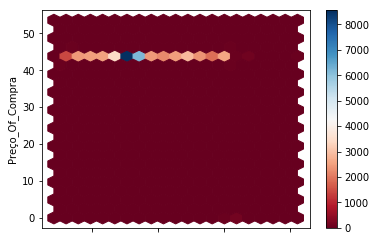

In [205]:
x = SUZB3['seconds']
y = SUZB3['Preço_Of_Compra']
SUZB3.plot.hexbin(x = 'seconds', y = 'Preço_Of_Compra', gridsize = 20, cmap = 'RdBu')

In [ ]:
best = [
SUZB3,
MGLU3,
FIBR3,
BTOW3,
VALE3,
BRKM5,
EMBR3,
PETR4,
CPFE3,
KLBN4]

worst = [
BRFS3,
KROT3,
ELET6,
QUAL3,
UGPA3,
ECOR3,
ELET3,
CCRO3,
SBSP3,
GOLL4]

## Exploration 

C:\Users\vipac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vipac\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  This is separate from the ipykernel package so we can avoid doing imports until


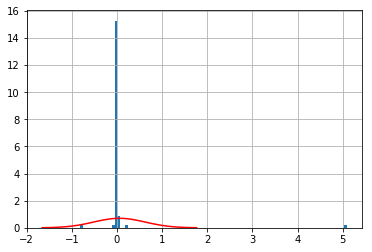

In [253]:
ELET6['return'].hist(bins = 100, normed = True, histtype = 'stepfilled', alpha = 1)
x = np.linspace(mean_ELET6 - 3*std_ELET6, mean_ELET6 + 3*std_ELET6,100)
plt.plot(x,mlab.normpdf(x, mean_ELET6,std_ELET6),"r")
plt.show()

In [ ]:
for i in best:
    i.hist(column = 'return', bins = 100, normed = True, histtype = 'stepfilled', alpha = 1, label = 'i')
    plt.ylabel('Frequency')

In [ ]:
for i in worst:
    i.hist(column = 'return', bins = 100, normed = True, histtype = 'stepfilled', alpha = 1, label = i)

In [ ]:
VaR_90 = [
norm.ppf(1-0.9, mean_SUZB3, std_SUZB3),
norm.ppf(1-0.9, mean_MGLU3, std_MGLU3),
norm.ppf(1-0.9, mean_FIBR3, std_FIBR3),
norm.ppf(1-0.9, mean_BTOW3, std_BTOW3),
norm.ppf(1-0.9, mean_VALE3, std_VALE3),
norm.ppf(1-0.9, mean_BRKM5, std_BRKM5),
norm.ppf(1-0.9, mean_EMBR3, std_EMBR3),
norm.ppf(1-0.9, mean_PETR4, std_PETR4),
norm.ppf(1-0.9, mean_CPFE3, std_CPFE3),
norm.ppf(1-0.9, mean_KLBN4, std_KLBN4),
norm.ppf(1-0.9, mean_BRFS3, std_BRFS3),
norm.ppf(1-0.9, mean_KROT3, std_KROT3),
norm.ppf(1-0.9, mean_ELET6, std_ELET6),
norm.ppf(1-0.9, mean_QUAL3, std_QUAL3),
norm.ppf(1-0.9, mean_UGPA3, std_UGPA3),
norm.ppf(1-0.9, mean_ECOR3, std_ECOR3),
norm.ppf(1-0.9, mean_ELET3, std_ELET3),
norm.ppf(1-0.9, mean_CCRO3, std_CCRO3),
norm.ppf(1-0.9, mean_SBSP3, std_SBSP3),
norm.ppf(1-0.9, mean_GOLL4, std_GOLL4)]

VaR_95 = [
norm.ppf(1-0.95, mean_SUZB3, std_SUZB3),
norm.ppf(1-0.95, mean_MGLU3, std_MGLU3),
norm.ppf(1-0.95, mean_FIBR3, std_FIBR3),
norm.ppf(1-0.95, mean_BTOW3, std_BTOW3),
norm.ppf(1-0.95, mean_VALE3, std_VALE3),
norm.ppf(1-0.95, mean_BRKM5, std_BRKM5),
norm.ppf(1-0.95, mean_EMBR3, std_EMBR3),
norm.ppf(1-0.95, mean_PETR4, std_PETR4),
norm.ppf(1-0.95, mean_CPFE3, std_CPFE3),
norm.ppf(1-0.95, mean_KLBN4, std_KLBN4),
norm.ppf(1-0.95, mean_BRFS3, std_BRFS3),
norm.ppf(1-0.95, mean_KROT3, std_KROT3),
norm.ppf(1-0.95, mean_ELET6, std_ELET6),
norm.ppf(1-0.95, mean_QUAL3, std_QUAL3),
norm.ppf(1-0.95, mean_UGPA3, std_UGPA3),
norm.ppf(1-0.95, mean_ECOR3, std_ECOR3),
norm.ppf(1-0.95, mean_ELET3, std_ELET3),
norm.ppf(1-0.95, mean_CCRO3, std_CCRO3),
norm.ppf(1-0.95, mean_SBSP3, std_SBSP3),
norm.ppf(1-0.95, mean_GOLL4, std_GOLL4)
]

print(tabulate([['90%', VaR_90[0], VaR_90[1], VaR_90[2], VaR_90[3], VaR_90[4], VaR_90[5], VaR_90[6], VaR_90[7], VaR_90[8], VaR_90[9]],
                ['95%', VaR_95[0], VaR_95[1], VaR_95[2], VaR_95[3], VaR_95[4], VaR_95[5], VaR_95[6], VaR_95[7], VaR_95[8], VaR_95[9]]], 
               headers = ['CL_best', 'SUZB3', 'MGLU3','FIBR3', 'BTOW3', 'VALE3', 'BRKM5', 'EMBR3','PETR4', 'CPFE3', 'KLBN4']))



print(tabulate([['90%', VaR_90[10], VaR_90[11], VaR_90[12], VaR_90[13], VaR_90[14], VaR_90[15], VaR_90[16], VaR_90[17], VaR_90[18], VaR_90[19]],
                ['95%', VaR_95[10], VaR_95[11], VaR_95[12], VaR_95[13], VaR_95[14], VaR_95[15], VaR_95[16], VaR_95[17], VaR_95[18], VaR_95[19]]], 
               headers = ['CL_worst', 'BRFS3', 'KROT3','ELET6', 'QUAL3', 'UGPA3', 'ECOR3', 'ELET3','CCRO3', 'SBSP3', 'GOLL4']))

In [ ]:
for i in best:
    i.sort_values('return', inplace = True, ascending = True)

In [ ]:
MGLU3

In [ ]:
MGLU3.isnull().sum()

In [ ]:
len(SUZB3['return'])

In [ ]:
df_vda = df_vda[df_vda["Símbolo_do_Instrumento"].isin(list)]

df_vda.drop(['Data_Sessão','Sentido_Of_Compra','Corretora'], inplace = True, axis = 1)